## Linear Regression

- One of the supervised learning methods, linear regression is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables).
- A linear regression line has an equation of the form `Y = a + bX`, where X is the explanatory variable and Y is the dependent variable. The slope of the line is b, and a is the intercept (the value of y when x = 0).
- Linear regression focuses on the conditional probability distribution of the response given the values of the predictors.

## Case Study: Sales Prediction

### Problem Statement

Build a model which predicts sales based on the money spent on different platforms for marketing.

### Data
Use the advertising dataset given. In this notebook, we'll build a linear regression model to predict `Sales` using an appropriate predictor variable.

### Loading Data

In [12]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [13]:
advertising = pd.read_csv("advertising.csv")
advertising.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### Data Cleaning and EDA

In [14]:
advertising.shape

(200, 5)

In [15]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [16]:
advertising.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [17]:
advertising.drop('Unnamed: 0', axis=1, inplace=True)

In [18]:
# Checking Null values
advertising.isnull().sum()*100/advertising.shape[0]
# There are no NULL values in the dataset, hence it is clean.

TV           0.0
radio        0.0
newspaper    0.0
sales        0.0
dtype: float64

###### Skewness

- Skewness is the degree of asymmetry observed in a probability distribution.
- Distributions can exhibit right (positive) skewness or left (negative) skewness to varying degrees. A normal distribution (bell curve) exhibits zero skewness.

###### Outliers
- Outliers are observations that lie far away from majority of observations in the dataset

In [21]:
## Closer look at the summary stats of the newspaper column
print(advertising["newspaper"].describe())

count    200.000000
mean      30.554000
std       21.778621
min        0.300000
25%       12.750000
50%       25.750000
75%       45.100000
max      114.000000
Name: newspaper, dtype: float64


###### Histogram

- A histogram is a graphical representation that organizes a group of data points into user-specified ranges. 
- Similar in appearance to a bar graph, the histogram condenses a data series into an easily interpreted visual by taking many data points and grouping them into logical ranges or bins.
- When data are skewed, the majority of the data are located on one side of the histogram.

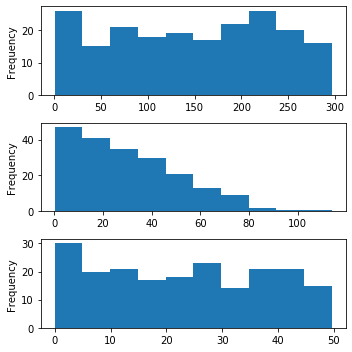

In [27]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = advertising['TV'].plot(kind='hist',ax = axs[0])
plt2 = advertising['newspaper'].plot(kind='hist',ax = axs[1])
plt3 = advertising['radio'].plot(kind='hist',ax = axs[2])
plt.tight_layout()

We observe skewness in the newspaper column. Long tail on the right indicates positive skewness

##### Boxplot

![alt text](https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png "Title")

- A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). 
- It can give information on the outliers (if any) and what their values are. It may also help us understand if the data is symmetrical, how tightly the data is grouped, and if and how the data is skewed.

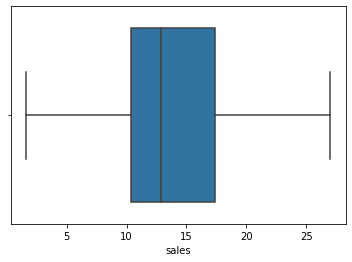

In [28]:
sns.boxplot(advertising['sales'])
plt.show()

We observe no potential outliers in the target variable

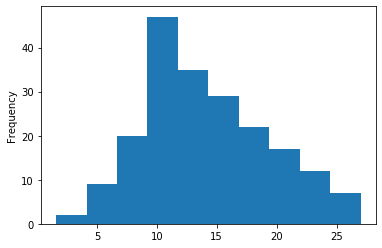

In [29]:
advertising['sales'].plot(kind='hist')

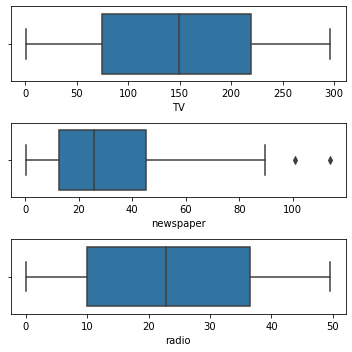

In [19]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(advertising['TV'], ax = axs[0])
plt2 = sns.boxplot(advertising['newspaper'], ax = axs[1])
plt3 = sns.boxplot(advertising['radio'], ax = axs[2])
plt.tight_layout()

There are no considerable outliers present in the data.

#### Sales (Target Variable)

##### EDA/Visualization

Exploratory results give us an idea about what to expect from the model and also supplement the model findings

###### Scatter plot
- A scatter plot is a chart type that is normally used to observe and visually display the relationship between variables where the values of the variables are represented by dots. 
- The positioning of the dots on the vertical and horizontal axis will inform the value of the respective data point; hence, scatter plots make use of Cartesian coordinates to display the values of the variables in a data set.

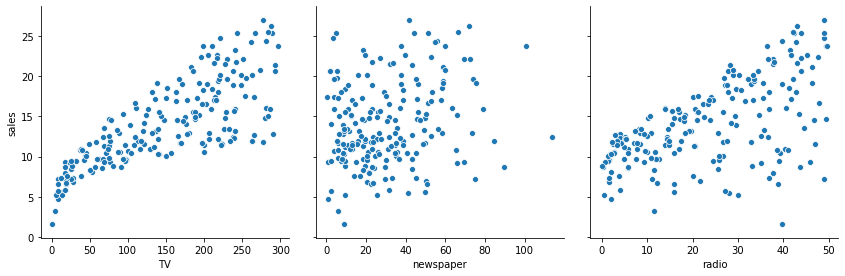

In [30]:
# Let's see how Sales is related to other variables using scatter plot.
sns.pairplot(advertising, x_vars=['TV', 'newspaper', 'radio'], y_vars='sales', height=4, aspect=1, kind='scatter')
plt.show()

We observe a positive correlation between Sales and TV, as well as Sales and radio. The scatterplot for Sales and newspaper doesn't show us any particular directional relationship so far. 

###### Correlation

- Correlation is a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate). 
- It’s a common tool for describing simple relationships without making a statement about cause and effect.

In [31]:
## Correlation matrix of numerical features
pd.options.display.float_format = '{:.2f}'.format
advertising.corr()

,TV,radio,newspaper,sales
TV,1.00,0.05,0.06,0.78
radio,0.05,1.00,0.35,0.58
newspaper,0.06,0.35,1.00,0.23
sales,0.78,0.58,0.23,1.00


Strong positive correlation between Sales with TV (0.78) and radio (0.58) TRPs

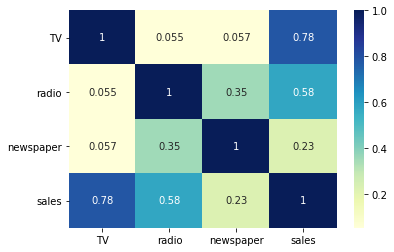

In [32]:
# Let's see the correlation between different variables.
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

As is visible from the pairplot and the heatmap, the variable `TV` and `radio` seems to be most correlated with `Sales`. 

In [33]:
X = advertising.drop(['sales'], axis=1)
y = advertising['sales']

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

### Building Linear Regression Model

Let's first look at building a linear regression model using the statsmodels.api to fully understand how the concept of statistical significance plays an important role when researching and protoyping models.

`statsmodels` is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. 
An extensive list of result statistics are available for each estimator. The results are tested against existing statistical packages to ensure that they are correct. 

In [35]:
import statsmodels.api as sm

## Adding constant term as we are using statsmodel
## By default, statsmodels fits a line passing through the origin, i.e. it doesn't fit an intercept 
## Hence, you need to use the command 'add_constant' so that it also fits an intercept

X_train1 = sm.add_constant(X_train)
X_test1 = sm.add_constant(X_test)

A regression without a constant means that the regression line goes through the origin wherein the dependent variable and the independent variable is equal to zero. Many times, the intercept makes no sense.

For example, suppose we use the rain to predict the quantity of wheat produced. Practically, if there is no rain, there would be no production. So in this situation, the regression line crosses the y-axis somewhere else beside zero, and the intercept doesn’t make any sense. However, the intercept is important to calculate the predicted values especially in the industry like analytics and market research and it is advised not to cross it out completely from the analysis.

In [36]:
## Instantiating the model object
model1 = sm.OLS(y_train,X_train1)

In [37]:
## Fitting the model
results1 = model1.fit()

In [38]:
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     377.6
Date:                Wed, 28 Jun 2023   Prob (F-statistic):           9.97e-66
Time:                        11:40:40   Log-Likelihood:                -280.83
No. Observations:                 140   AIC:                             569.7
Df Residuals:                     136   BIC:                             581.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6528      0.384      6.906      0.0

Let's take a glance at the different terms and measures charted out in the summary table.


- R-squared: Measures the proportion of variation in the dependent variable explained by the independent variable(s); sometimes addition of predictor variables increase the value of R-square, hence it becomes difficult to decide whether additional variables are adding to the predictability power of the regression.

- Adjusted R-squared: Modified version of R-squared which is adjusted for the number of variables in the regression; increases only when an additional variable adds to the explanatory power to the regression.

- AIC: Stands for Akaike’s Information Criteria and is used for model selection; penalizes the errors made in case a new variable is added to the regression equation; calculated as number of parameters minus the likelihood of the overall model; lower the AIC, better the model.

- BIC: Stands for Bayesian information criteria; a variant of AIC where penalties are made more severe.

- Prob(F-Statistic): Tells the overall significance of the regression; assess the significance level of all the variables together; the null hypothesis under this is “all the regression coefficients are equal to zero”; depicts the probability of null hypothesis being true.

- Prob(Omnibus): Omnibus test is performed in order to test the null hypothesis of OLS that the errors are normally distributed; Prob(Omnibus) is supposed to be close to the 1 in order for it to satisfy the OLS assumption 

- Durbin-Watson: Measures the autocorrelation; Durbin-Watson statistic close to 2 implies absence of correlation.

- Prob(Jarque-Bera): Also performed for the distribution analysis of the regression errors; supposed to agree with the results of Omnibus test; a large value of JB test indicates that the errors are not normally distributed.

- Kurtosis: A statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution; determines the heaviness of the distribution tails; positive value indicates heavy-tails (i.e. a lot of data in the tails) while negative value means light-tails (i.e. little data in the tails).

- p-value: A measure of the probability that an observed difference could have occurred just by random chance; lower the p-value, greater the statistical significance of the observed difference; can be used as an alternative to or in addition to pre-selected confidence levels for hypothesis testing.

###### Interpretation

The Adj R2 is 89% - given the limited data we have, the value is pretty good. 

In this first run – the predictor newspaper is statistically insigficant due to its large p-value.

##### Backward Elimination

- A feature selection technique while building a machine learning model; used to remove those features that do not have a significant effect on the dependent variable or prediction of output

Following are the steps involved:
1. Select a threshold p-value (usually 0.05 or 5%)
2. Fit the complete model with all possible predictors/independent variables
3. Identify the predictor with the highest p-value
4. If the highest p-value is greater than the threshold, remove that particular predictor & fit the model with the remaining
5. Repeat steps 3-4 until all those predictors whose p-value > threshold is removed

In [40]:
## Remove factors with high p-value
X_train2 = X_train1.drop('newspaper', axis=1)
X_test2 = X_test1.drop('newspaper', axis=1)

In [41]:
## Fitting model post dropping features with high p-value
model2 = sm.OLS(y_train,X_train2)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     568.8
Date:                Wed, 28 Jun 2023   Prob (F-statistic):           4.46e-67
Time:                        11:43:36   Log-Likelihood:                -281.03
No. Observations:                 140   AIC:                             568.1
Df Residuals:                     137   BIC:                             576.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7190      0.368      7.392      0.0

Adjusted R-squared has gone up from 89% to 89.1%. The remaining predictors p-values are < 0.05, hence they are statistically significant predictors, i.e., they have a significant impact on sales.

Usually, backward elimination involves a couple more steps to get rid of statistically insigficant predictors in each step. Hence, it is call Stepwise Backward Elimination. While it is an important technique, we also need to make sure we don't blindly hack off any values whose p-values > 0.05. At every elimination, we must keep an out on Adjusted R-squared to make sure that there's some improvement when dropping these predictors.

Ok, now that we have our model ready -model2- let's move onto some evalutaion metrics.

#### Evaluation Metrics

- `MSE(Mean squared error)`: tells you how close a regression line is to a set of points; does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them.

- `RMSE (Root mean squared error)`: the standard deviation of the residuals (prediction errors); RMSE is a measure of how spread out these residuals are

- `MAE (Mean Absolute Error)`: measures the average magnitude of the errors in a set of forecasts, without considering their direction

- `R-squared (R2)`: a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [45]:
predictions = results2.predict(X_test2)

In [46]:
actuals = y_test

In [47]:
## Mean Absolute error
mae = mean_absolute_error(actuals,predictions)
mae

1.0397500099187946

In [48]:
## Mean squared error
mse = mean_squared_error(actuals,predictions)
mse

1.7847400520902885

In [49]:
## Root mean squared error
rmse = mean_squared_error(actuals,predictions,squared=False)
rmse

1.3359416349864572

In [50]:
## R-squared
r2 = r2_score(actuals,predictions)
r2

0.9092164491718215

In [51]:
## MAPE - the sum of the individual absolute errors divided by the demand
## It is the average of the percentage errors
## The lower the value for MAPE, the better a model is able to predict values

mape = np.mean(abs((actuals - predictions)/actuals)) 
mape

0.09301346546190234

#### Inference
R-squared is 91% which is really good for the data in question. Also, the error metric values are not too huge which is a good sign.

BUT - error metrics like MSE, RMSE, MAE, MAPE, they come into play when we need to compare more than 1 model to choose the best one.

### Assumption Of Linear Regression


#### 1. Linearity
This assumes that there is a linear relationship between the predictors (e.g. independent variables or features) and the response variable (e.g. dependent variable or label). This also assumes that the predictors are additive.


#### Why it can happen:
There may not just be a linear relationship among the data. Modeling is about trying to estimate a function that explains a process, and linear regression would not be a fitting estimator (pun intended) if there is no linear relationship.

#### How will it affect: 
The predictions will be extremely inaccurate because our model is underfitting. This is a serious violation that should not be ignored.

#### How to detect it: 
If there is only one predictor, this is pretty easy to test with a scatter plot. Most cases aren’t so simple, so we’ll have to modify this by using a scatter plot to see our predicted values versus the actual values (in other words, view the residuals). Ideally, the points should lie on or around a diagonal line on the scatter plot.


#### How to fix it: 
Either adding polynomial terms to some of the predictors or applying nonlinear transformations. If those do not work, try adding additional variables to help capture the relationship between the predictors and the label.

In [52]:
# Create predictions on the features with the model and calculates residuals

predictions = results2.predict(X_train2)
df_results = pd.DataFrame({'Actual': y_train, 'Predicted': predictions})
df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
df_results

,Actual,Predicted,Residuals
74,17.00,17.17,-0.17
3,18.50,17.57,0.93
185,22.60,20.73,1.87
26,15.00,14.87,0.13
90,11.20,9.78,1.42
...,...,...,...
87,16.00,15.57,0.43
103,14.70,14.59,0.11
67,13.40,11.85,1.55
24,9.70,7.98,1.72


`seaborn.lmplot(*, x=None, y=None, data=None, hue=None, col=None, row=None, palette=None, col_wrap=None, height=5, aspect=1, markers='o', sharex=None, sharey=None, hue_order=None, col_order=None, row_order=None, legend=True, legend_out=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, x_jitter=None, y_jitter=None, scatter_kws=None, line_kws=None, facet_kws=None, size=None)`

- lmplot plots data and regression model fits across a FacetGrid.
- This function combines regplot() and FacetGrid. It is intended as a convenient interface to fit regression models across conditional subsets of a dataset.

**Parameters**
- x, y: strings, optional
  
  Input variables; these should be column names in data.

- data: DataFrame
  
  Tidy (“long-form”) dataframe where each column is a variable and each row is an observation.

- hue,col,row: strings
  
  Variables that define subsets of the data, which will be drawn on separate facets in the grid. 

- palette: palette name, list, or dict
  
  Colors to use for the different levels of the hue variable. Should be something that can be interpreted by color_palette(), or a dictionary mapping hue levels to matplotlib colors.

- col_wrap: int
  
  “Wrap” the column variable at this width, so that the column facets span multiple rows. Incompatible with a row facet.

- height: scalar
  
  Height (in inches) of each facet.

- aspect: scalar
  
  Aspect ratio of each facet, so that aspect * height gives the width of each facet in inches.

- markers: matplotlib marker code or list of marker codes, optional
  
  Markers for the scatterplot. If a list, each marker in the list will be used for each level of the hue variable.

- share{x,y}: bool, ‘col’, or ‘row’ optional
  
  If true, the facets will share y axes across columns and/or x axes across rows.

- {hue,col,row}_order: lists, optional
  
  Order for the levels of the faceting variables. By default, this will be the order that the levels appear in data or, if the variables are pandas categoricals, the category order.

- legend: bool, optional
  
  If True and there is a hue variable, add a legend.

- legend_out: bool
  
  If True, the figure size will be extended, and the legend will be drawn outside the plot on the center right.

- x_estimator: callable that maps vector -> scalar, optional
  
  Apply this function to each unique value of x and plot the resulting estimate. This is useful when x is a discrete variable. If x_ci is given, this estimate will be bootstrapped and a confidence interval will be drawn.

- x_bins: int or vector, optional
  
  Bin the x variable into discrete bins and then estimate the central tendency and a confidence interval. This binning only influences how the scatterplot is drawn; the regression is still fit to the original data. This parameter is interpreted either as the number of evenly-sized (not necessary spaced) bins or the positions of the bin centers. When this parameter is used, it implies that the default of x_estimator is numpy.mean.

- x_ci: “ci”, “sd”, int in [0, 100] or None, optional
  
  Size of the confidence interval used when plotting a central tendency for discrete values of x. If "ci", defer to the value of the ci parameter. If "sd", skip bootstrapping and show the standard deviation of the observations in each bin.

- scatter: bool, optional

  If True, draw a scatterplot with the underlying observations (or the x_estimator values).

- fit_reg: bool, optional
  
  If True, estimate and plot a regression model relating the x and y variables.

- ci: int in [0, 100] or None, optional

  Size of the confidence interval for the regression estimate. This will be drawn using translucent bands around the regression line. The confidence interval is estimated using a bootstrap; for large datasets, it may be advisable to avoid that computation by setting this parameter to None.

- n_boot: int, optional
  
  Number of bootstrap resamples used to estimate the ci. The default value attempts to balance time and stability; you may want to increase this value for “final” versions of plots.

- units: variable name in data, optional

  If the x and y observations are nested within sampling units, those can be specified here. This will be taken into account when computing the confidence intervals by performing a multilevel bootstrap that resamples both units and observations (within unit). This does not otherwise influence how the regression is estimated or drawn.

- seed: int, numpy.random.Generator, or numpy.random.RandomState, optional

  Seed or random number generator for reproducible bootstrapping.

- order: int, optional

  If order is greater than 1, use numpy.polyfit to estimate a polynomial regression.

- logistic: bool, optional

  If True, assume that y is a binary variable and use statsmodels to estimate a logistic regression model. Note that this is substantially more computationally intensive than linear regression, so you may wish to decrease the number of bootstrap resamples (n_boot) or set ci to None.

- lowess: bool, optional

  If True, use statsmodels to estimate a nonparametric lowess model (locally weighted linear regression). Note that confidence intervals cannot currently be drawn for this kind of model.

- robust: bool, optional

  If True, use statsmodels to estimate a robust regression. This will de-weight outliers. Note that this is substantially more computationally intensive than standard linear regression, so you may wish to decrease the number of bootstrap resamples (n_boot) or set ci to None.

- logx: bool, optional

  If True, estimate a linear regression of the form y ~ log(x), but plot the scatterplot and regression model in the input space. Note that x must be positive for this to work.

- {x,y}_partial: strings in data or matrices

  Confounding variables to regress out of the x or y variables before plotting.

- truncate: bool, optional

  If True, the regression line is bounded by the data limits. If False, it extends to the x axis limits.

- {x,y}_jitter: floats, optional

  Add uniform random noise of this size to either the x or y variables. The noise is added to a copy of the data after fitting the regression, and only influences the look of the scatterplot. This can be helpful when plotting variables that take discrete values.

- {scatter,line}_kws: dictionaries

  Additional keyword arguments to pass to plt.scatter and plt.plot.

- facet_kws: dict

  Dictionary of keyword arguments for FacetGrid.

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


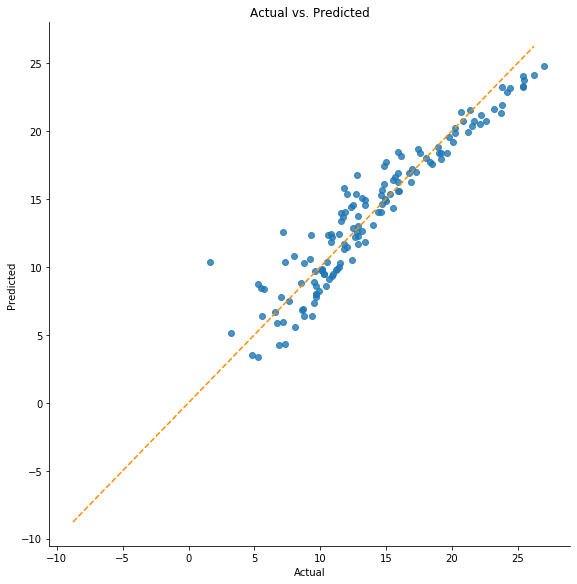

In [53]:
print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
print('Checking with a scatter plot of actual vs. predicted.',
      'Predictions should follow the diagonal line.')

# Plotting the actual vs predicted values
sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, height=8)
        
# Plotting the diagonal line
line_coords = np.arange(df_results.min().min(), df_results.max().max())
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')
plt.title('Actual vs. Predicted')
plt.show()

- We can see a relatively even spread around the diagonal line
- We may conclude that linearity assumption is satisfied

#### 2. Normality of the Error Terms
More specifically, this assumes that the error terms of the model are normally distributed. Linear regressions other than Ordinary Least Squares (OLS) may also assume normality of the predictors or the label, but that is not the case here.

#### Why it can happen: 
This can actually happen if either the predictors or the label are significantly non-normal. Other potential reasons could include the linearity assumption being violated or outliers affecting our model.

#### How will it affect:
A violation of this assumption could cause issues with either shrinking or inflating our confidence intervals.

#### How to detect it: 
There are various ways to do so, but Q-Q plot is the simplest of all.

#### How to fix it:
It depends on the root cause, but there are a few options. Nonlinear transformations of the variables, excluding specific variables (such as long-tailed variables), or removing outliers may solve this problem.

###### Q-Q Plot
- Q-Q or quantile-quantile is a scatter plot which helps us validate the assumption of normal distribution in a data set.
- Using this plot we can infer if the data comes from a normal distribution. If yes, the plot would show fairly straight line.
- Absence of normality in the errors can be seen with deviation in the straight line.

![alt text](https://www.analyticsvidhya.com/wp-content/uploads/2016/07/quantile.png "Normal vs Not Normal QQ")

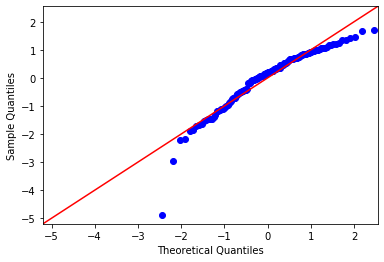

In [54]:
# Getting Residuals 
res = results2.resid

# Checking for normality of error
fig = sm.qqplot(res, fit=True, line='45')
plt.show()

The residuals appear to be normally distributed from the q-q plot

### 3. No Multicollinearity Among Predictors
This assumes that the predictors used in the regression are not correlated with each other. This won’t render our model unusable if violated, but it will cause issues with the interpretability of the model.

#### Why it may happen: 
A lot of data is just naturally correlated. Features normally have some level of correlation with each other.

#### How will it affect:
Multicollinearity causes issues with the interpretation of the coefficients. Specifically, you can interpret a coefficient as “an increase of 1 in this predictor results in a change of (coefficient) in the response variable, holding all other predictors constant.” This becomes problematic when multicollinearity is present because we can’t hold correlated predictors constant. Additionally, it increases the standard error of the coefficients, which results in them potentially showing as statistically insignificant when they might actually be significant.

#### How to detect it:
We will examine the variance inflation factor (VIF).

#### How to fix it: 
This can be fixed by other removing predictors with a high variance inflation factor (VIF) or performing dimensionality reduction.

#### Multicollinearity Check

- Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model; that is an independent variable can be predicted from another independent variable in a regression model.
- Multicollinearity can be a problem in a regression model because we would not be able to distinguish between the individual effects of the independent variables on the dependent variable.
- Multicollinearity may not affect the accuracy of the model as much, but we may lose reliability while determining the effects of individual features in your model – and that can be a problem when it comes to interpretability.


**patsy is a Python package for describing statistical models (especially linear models, or models that have a linear component) and building design matrices**

For calculating vif, we’ll have to create an X matrix and a y matrix so we create a dmatrices() and fitting the model into it.

X matrix with all the features + intercept


In [55]:
#pip install patsy

In [56]:
from patsy import dmatrices

In [58]:
Y, X = dmatrices('sales~TV+radio',
                 data=advertising, return_type='dataframe')

In [59]:
X.head()

,Intercept,TV,radio
0,1.00,230.10,37.80
1,1.00,44.50,39.30
2,1.00,17.20,45.90
3,1.00,151.50,41.30
4,1.00,180.80,10.80


In [60]:
Y.head()

,sales
0,22.10
1,10.40
2,9.30
3,18.50
4,12.90


#### Variance Inflation Factor (VIF)

- VIF is a measure of the amount of multicollinearity in a set of multiple regression variables. 
- Mathematically, the VIF for a regression model variable is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable. This ratio is calculated for each independent variable. 
- A high VIF indicates that the associated independent variable is highly collinear with the other variables in the model.

In [61]:
## VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [63]:
vif.round(1)

,VIF Factor,features
0,6.10,Intercept
1,1.00,TV
2,1.00,radio


- TV and radio are slightly correlated but within the tolerable VIF range of 5 since VIF between two factors should be <5.

### 4. No Autocorrelation of the Error Terms
The presence of correlation in error terms drastically reduces model’s accuracy. This usually occurs in time series models where the next instant is dependent on previous instant. If the error terms are correlated, the estimated standard errors tend to underestimate the true standard error.

If this happens, it causes confidence intervals and prediction intervals to be narrower. Narrower confidence interval means that a 95% confidence interval would have lesser probability than 0.95 that it would contain the actual value of coefficients.

#### Why it may happen: 
In a time series scenario, there could be information about the past that we aren’t capturing. In a non-time series scenario, our model could be systematically biased by either under or over predicting in certain conditions. Lastly, this could be a result of a violation of the linearity assumption.

#### How will it affect: 
Will impact our model estimates.

#### How to detect it: 
We will perform a Durbin-Watson test to determine if either positive or negative correlation is present. Durbin–Watson (DW) statistic must lie between 0 and 4. If DW = 2, implies no autocorrelation, 0 < DW < 2 implies positive autocorrelation while 
2 < DW < 4 indicates negative autocorrelation.

Alternatively, you could create residual vs time plot and look for the seasonal or correlated pattern in residual values.

#### How to fix it: 
A simple fix of adding lag variables can fix this problem. Alternatively, interaction terms, additional variables, or additional transformations may fix this.

In [65]:
from statsmodels.stats.stattools import durbin_watson

print('Assumption 4: No Autocorrelation', '\n')
print('\nPerforming Durbin-Watson Test')
print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
print('0 to 2< is positive autocorrelation')
print('>2 to 4 is negative autocorrelation')
print('-------------------------------------')

durbinWatson = durbin_watson(df_results['Residuals'])
print('Durbin-Watson:', durbinWatson)

if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.8621284589451725
Little to no autocorrelation 

Assumption satisfied


### 5. Homoscedasticity
Homoscedasticity describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the features and the target) is the same across all values of the independent variables. Linear regression assumes homoscedasticity, which is the same variance within our error terms.

Heteroscedasticity, the violation of homoscedasticity, occurs when we don’t have an even variance across the error terms.

#### Why it can happen: 
Our model may be giving too much weight to a subset of the data, particularly where the error variance was the largest.

#### How will it affect: 
Significance tests for coefficients due to the standard errors being biased. Additionally, the confidence intervals will be either too wide or too narrow.

#### How to detect it: 
Plot the residuals and see if the variance appears to be uniform.
### How to fix it: 
Heteroscedasticity can be solved either by using weighted least squares regression instead of the standard OLS or transforming either the dependent or highly skewed variables. Performing a log transformation on the dependent variable is not a bad place to start.

![alt text](https://miro.medium.com/max/875/1*Jan9oVOzNqQyhA4bSg_zwA.png "Homo vs heteroscedasticity")

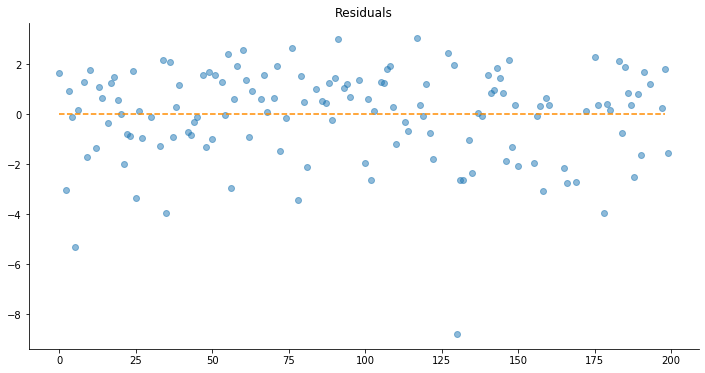

In [66]:
# Plotting the residuals

plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
ax.spines['right'].set_visible(False)  # Removing the right spine
ax.spines['top'].set_visible(False)  # Removing the top spine
plt.title('Residuals')
plt.show()  

No discernible pattern detected in the residuals plot. Hence, homoscedasticity assumption satisfied

### Building Linear Regression Model - using Scikit-learn

## Simple Linear Regression

Analyse the relationship between 'TV advertising' and 'sales' using a simple linear regression model. 

## Model Building

### Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

---

### Generic Steps in model building using `Scikit`

We first assign the feature variable, `TV`, in this case, to the variable `X` and the response variable, `Sales`, to the variable `y`.

In [75]:
X = advertising[['TV']]
y = advertising['sales']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [67]:
from sklearn.linear_model import LinearRegression

In [77]:
lr = LinearRegression()

In [78]:
lr.fit(X_train, y_train)

LinearRegression()

In [79]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.coef_, lr.intercept_

(array([0.04649736]), 6.98966585741168)

In [80]:
from sklearn.metrics import r2_score
r2_score(y, lr.predict(X))

0.610167945980631

####  Looking at some key statistics from the summary

The values we are concerned with are - 
1. The coefficients
2. R-squared

##### 1. The coefficient for TV is 0.04649736, 
For every 1 unit increase in TV TRPs, sales increases by 0.04 times

##### 2. R - squared is 0.610
Meaning that 61.0% of the variance in `Sales` is explained by `TV`

This is a decent R-squared value.

---
The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

$ Sales = 6.98966585741168 + 0.04649736 \times TV $

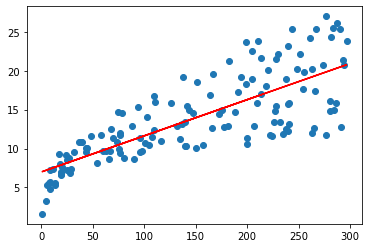

In [81]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.98966585741168 + 0.04649736*X_train, 'r')
plt.show()

## Model Evaluation

### Residual analysis 
To validate assumptions of the model, and hence the reliability for inference

#### Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [82]:
y_train_pred = lr.predict(X_train)
res = (y_train - y_train_pred)

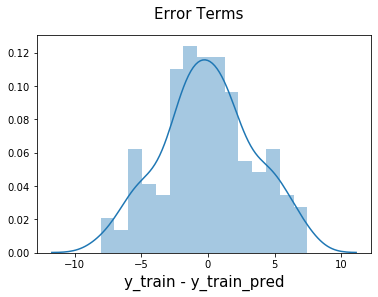

In [83]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

The residuals are normally distributed with a mean 0. All good!

#### Looking for patterns in the residuals

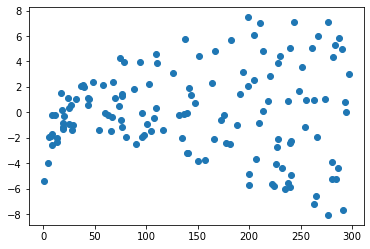

In [84]:
plt.scatter(X_train,res)
plt.show()

We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

As you can see, the regression line is a pretty good fit to the data

### Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the `X_test` data like you did for `X_train` and then you can simply go on and predict the y values corresponding to `X_test` using the `predict` attribute of the fitted regression line.

In [85]:
# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test)

In [86]:
y_pred

array([ 7.35234526, 18.06533671, 13.27610876, 17.11214086, 18.22807747,
       16.60531965, 13.4620982 , 16.17754395, 17.05169429, 17.07029323,
       12.4391563 , 17.66080969,  9.60281742, 15.72186983, 11.04423554,
       11.36971705, 13.95032046, 14.90351632, 14.59198401, 12.23921766,
       16.97264878, 13.00642408, 16.07524976, 15.21969836, 15.58702749,
       17.23303399, 17.20978531, 10.49091697, 15.58702749, 12.71349072,
       10.1700852 , 10.19798361, 12.61584627, 15.74976825,  9.31453379,
       12.59259759, 11.50920913, 14.81982107, 17.33067844, 15.97295557,
       17.00519693, 15.15925179, 14.63848137, 17.14933874, 12.57864838,
       11.16047894,  7.77547122, 18.55820871, 10.27237939,  8.76586496,
       16.405381  , 14.95466341, 10.4816175 , 13.08546959, 16.78665935,
        9.05879832,  7.78942043,  8.17999824, 16.17754395, 10.9744895 ])

In [87]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##### Looking at the RMSE

In [88]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.8241456288327007

###### Checking the R-squared on the test set

In [89]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.5942987267783302

##### Visualizing the fit on the test set

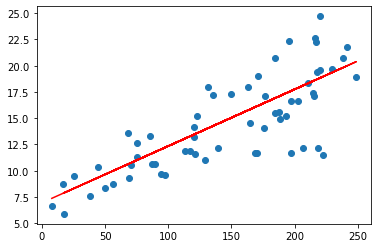

In [90]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()

## Multi Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>
---

### Generic Steps in model building using `Scikit`

We first assign the feature variable, `TV`, in this case, to the variable `X` and the response variable, `Sales`, to the variable `y`.

In [91]:
advertising

,TV,radio,newspaper,sales
0,230.10,37.80,69.20,22.10
1,44.50,39.30,45.10,10.40
2,17.20,45.90,69.30,9.30
3,151.50,41.30,58.50,18.50
4,180.80,10.80,58.40,12.90
...,...,...,...,...
195,38.20,3.70,13.80,7.60
196,94.20,4.90,8.10,9.70
197,177.00,9.30,6.40,12.80
198,283.60,42.00,66.20,25.50


In [92]:
X = advertising[['TV', 'radio', 'newspaper']]
y = advertising['sales']

#### Train-Test Split

You now need to split our variable into training and testing sets. You'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [94]:
# Let's now take a look at the train dataset

X_train.head()

,TV,radio,newspaper
74,213.40,24.60,13.10
3,151.50,41.30,58.50
185,205.00,45.10,19.60
26,142.90,29.30,12.60
90,134.30,4.90,9.30


In [95]:
y_train.head()

74    17.00
3     18.50
185   22.60
26    15.00
90    11.20
Name: sales, dtype: float64

#### Building a Linear Model

In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
lr = LinearRegression()

In [98]:
lr.fit(X_train, y_train)

LinearRegression()

In [99]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.coef_, lr.intercept_

(array([0.0454256 , 0.18975773, 0.00460308]), 2.652789668879496)

In [100]:
from sklearn.metrics import r2_score
r2_score(y, lr.predict(X))

0.8958983443016011

####  Looking at some key statistics from the summary

The values we are concerned with are - 
2. R-squared

##### 1. R - squared is 0.8958983443016011
Meaning that around 90% of the variance in `Sales` is explained by predictors

This is a decent R-squared value.

## Model Evaluation

### Residual analysis 
To validate assumptions of the model, and hence the reliability for inference

#### Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [101]:
y_train_pred = lr.predict(X_train)
res = (y_train - y_train_pred)

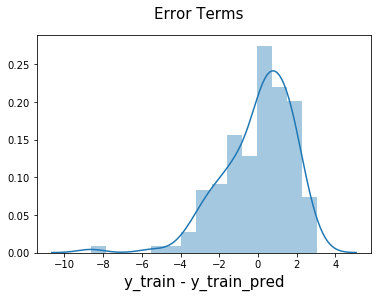

In [102]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

### Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the `X_test` data like you did for `X_train` and then you can simply go on and predict the y values corresponding to `X_test` using the `predict` attribute of the fitted regression line.

In [103]:
# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test)

In [104]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##### Looking at the RMSE

In [105]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

1.3603977338130555

###### Checking the R-squared on the test set

In [106]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.9058622107532245

We can clearly observe that the R-squared is much higher, around 91%. We can either finalize on this model or we can make it better by tuning the model. (tuning will be covered in the later sessions)

### end of the notebook.